Digite o número de pontos: 3
Digite os pares (x, y):
x[0]: 1
y[0]: 0
x[1]: 4
y[1]: 1.386294
x[2]: 6
y[2]: 1.791759
Digite o valor de x para estimar y (dentro do intervalo): 2
Estimativa: y(2.0) ≈ 0.4621


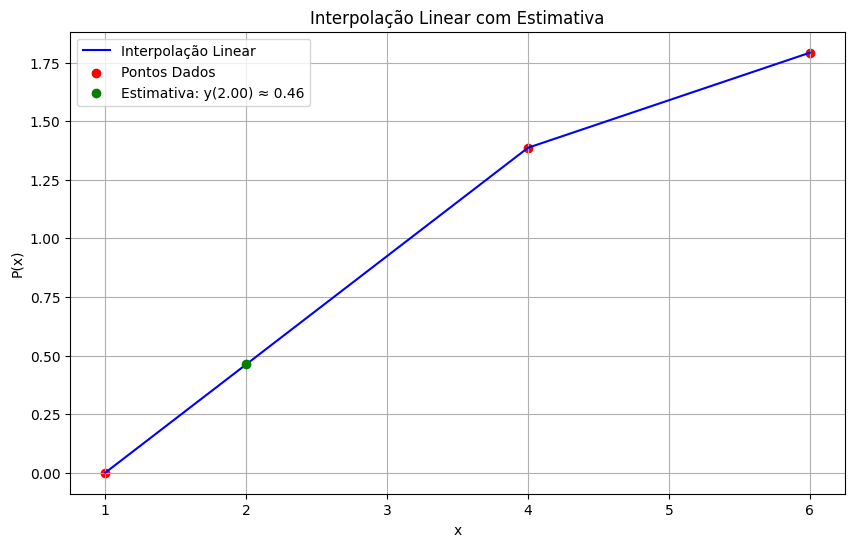

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Solicita ao usuário a quantidade de pontos
n = int(input("Digite o número de pontos: "))

x_vals = []
y_vals = []

print("Digite os pares (x, y):")
for i in range(n):
    x = float(input(f"x[{i}]: "))
    y = float(input(f"y[{i}]: "))
    x_vals.append(x)
    y_vals.append(y)

# Converte para arrays NumPy e ordena por x
x_vals = np.array(x_vals)
y_vals = np.array(y_vals)
sorted_indices = np.argsort(x_vals)
x_vals = x_vals[sorted_indices]
y_vals = y_vals[sorted_indices]

# Função para interpolação linear entre dois pontos
def interpolar_linear(x, x0, y0, x1, y1):
    return y0 + (y1 - y0) * (x - x0) / (x1 - x0)

# Estimativa do valor de y em um ponto fornecido pelo usuário
x_est = float(input("Digite o valor de x para estimar y (dentro do intervalo): "))

# Verifica em qual intervalo x_est se encontra
y_est = None
for i in range(len(x_vals) - 1):
    if x_vals[i] <= x_est <= x_vals[i+1]:
        y_est = interpolar_linear(x_est, x_vals[i], y_vals[i], x_vals[i+1], y_vals[i+1])
        break

if y_est is not None:
    print(f"Estimativa: y({x_est}) ≈ {y_est:.4f}")
else:
    print("O valor de x está fora do intervalo de interpolação.")

# Geração dos valores para o gráfico
x_interp = np.linspace(min(x_vals), max(x_vals), 500)
y_interp = []

for i in range(len(x_vals) - 1):
    x_segment = x_interp[(x_interp >= x_vals[i]) & (x_interp <= x_vals[i+1])]
    y_segment = interpolar_linear(x_segment, x_vals[i], y_vals[i], x_vals[i+1], y_vals[i+1])
    y_interp.extend(y_segment)

x_interp_plot = np.linspace(min(x_vals), max(x_vals), len(y_interp))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_interp_plot, y_interp, label='Interpolação Linear', color='blue')
plt.scatter(x_vals, y_vals, color='red', label='Pontos Dados')
if y_est is not None:
    plt.scatter(x_est, y_est, color='green', label=f'Estimativa: y({x_est:.2f}) ≈ {y_est:.2f}', zorder=5)
plt.title('Interpolação Linear com Estimativa')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.grid(True)
plt.legend()
plt.show()
